In [1]:
import h5py
import h5glance
import extra_geom
import ipywidgets as widgets
import matplotlib.pyplot as plt

There is a NeXus file created from the run №29 (proposal 2120, by A. Barty). The file was compiled with `extra-data` [package](https://github.com/European-XFEL/EXtra-data) (EuXFEL) and a custom script written on top of [`cctbx`](https://github.com/cctbx/cctbx_project/). The latest [HDRMX definitions](https://github.com/HDRMX/definitions) were used during the creation process. The file contains *filtered* AGIPD data aligned with XGM data.

We can inspect this file briefly using [`h5glance`](https://github.com/European-XFEL/h5glance/): 

In [2]:
f_name = '/gpfs/exfel/data/scratch/nexus/r0029_xgm_master_from_defs.h5'
f = h5py.File(f_name, 'r')
h5glance.H5Glance(f)

The run has $N=4998$ trains with $120$ pulses per train. In total it gives $599760$ detector images and the same number of XGM values:

In [3]:
ds = f['/entry/data/data']
xgm = f['/entry/instrument/beam/total_flux']
print(f"XGM shape: {xgm.shape}")
print(f"data set shape: {ds.shape}")

XGM shape: (4998, 120)
data set shape: (599760, 16, 512, 128)


To visualise images one can use `extra-geom` [package](https://github.com/European-XFEL/EXtra-geom). We take predefined [AGIPD geometry](https://extra-geom.readthedocs.io/en/latest/agipd_geometry.html) information for this:

In [4]:
geom = extra_geom.AGIPD_1MGeometry.from_quad_positions(quad_pos=[
    (-525, 625),
    (-550, -10),
    (520, -160),
    (542.5, 475),
])

The following player allows to see the real detector images, click ▶️ to play:

In [6]:
play = widgets.Play(
   interval=3000,   # time im ms
   value=0,
   min=0,
   max=120,
   step=1
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
ui = widgets.HBox([play])
def func(train_id):
    geom.plot_data_fast(ds[train_id*120], vmin=0, vmax=1000);

display(ui)
widgets.interact(func,train_id=slider);

interactive(children=(IntSlider(value=0, description='train_id'), Output()), _dom_classes=('widget-interact',)…

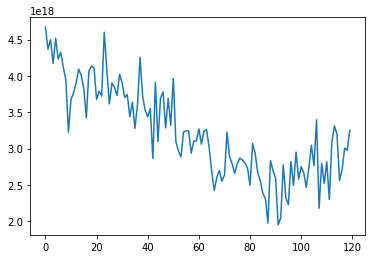

In [5]:
plt.plot(xgm[0])